## <u>Preface:</u>

The goal of this jupyter notebook is to find some concrete "criterias", that strongly influence the probability for a passenger to survive.
With those criterias and paired with a tensorflow model, the goal is to determine, wether or not a given person would survive the titanic accident.

The training data set was provided from kaggle: https://www.kaggle.com/competitions/titanic

<u><strong>TODO: Clean documentation</u></strong>

For every "section" (idealy about 15/20 different criterias):
- Introductory paragraph with base theory or hypothesis (eventually based on historical facts)
- Computations with pandas/numpy to check theory
- Conclusion: were we right/wrong -> possible explanation
- Link to other similar/related sections

Conclusion section:
- List all major found criterias, no further need to explain them, more of a listing, with concrete "facts"/values, that can be used for prediction algorithm
- Explanation, how to resume the criterias (with each one having a score for relevance: higher -> more important criteria)

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# Helper Functions
def toPercent(value):
    return round(round(value,3)*100,1)

def size(value):
    return value.shape[0]

In [82]:
file = "Data/train.csv"

df = pd.read_csv(file, sep = ",")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### <u>Criteria List:</u>

- PassengerId (should not be relevant for the analysis)
- Ticket Number (probably no correlation with survival probability)<br>
<br>
- [Passenger Class (First, Second, Third)](#udoes-the-passenger-class-influence-the-odd-of-survivingu)
- [Sex](#u-did-gender-influence-your-odd-of-survivingu)
- [Age](#u-does-the-age-of-a-passenger-influence-its-survival-oddu)
- [Number of siblings/spouses on Titanic](#udid-traveling-alone-increase-your-survival-rateu)
- [Number of parents/children on Titanic](#udid-traveling-alone-increase-your-survival-rateu)
- Fare (Price paid)
- Cabin Number (Not always existent)
- Embarkation Port (C = Cherbourg, Q = Queenstown, S = Southampton)

For each of the given criterias, there will be a statistical analysis and afterwards a possible explanation for that outcome.

Although all of those criterias can be seen individualy, it makes sense to combine some of then additionaly, as for example:
- Age and gender (to take into account male and female children)

From a historical point of view, we know for example that people from first and second class had a shorter  "way" to the rescue boats. Those additional thoughts will be analysed in a separate paragraph at the end.

##### <u>Basic Information</u>

In [83]:
totalPassengers = size(df)

passengersDead = df[df["Survived"] == 0]
passengersAlive = df[df["Survived"] == 1]

print(f"Total passengers: {totalPassengers}\nPassengers Survived: {size(passengersAlive)}\nPassengers Dead: {size(passengersDead)}\nSurvival rate: {toPercent(size(passengersAlive)/totalPassengers)}%")

Total passengers: 891
Passengers Survived: 342
Passengers Dead: 549
Survival rate: 38.4%


##### <u>Does the passenger class influence the odd of surviving?</u>

The Titanic was divided into three classes:
- The first class (Premium Class)
- The second class (Buisness Class)
- The third class (Economy Class)

The ticket prize for "lower" classes was way higher, therefore the first class was mainly occupied by "rich" passengers. It is historicaly known that the first and second class were separated from the third class to prevent the "spread of infections".

With those two facts, it would make sense, that passengers in first (and second) class would have higher survival chances:

In [84]:
firstClass= df[df.Pclass == 1]
secondClass = df[df.Pclass == 2]
thirdClass = df[df.Pclass == 3]

print(f"First class: {size(firstClass)}\nSecond class: {size(secondClass)}\nThird class: {size(thirdClass)}\nTotal: {totalPassengers}")

First class: 216
Second class: 184
Third class: 491
Total: 891


First class survival ratio:

In [85]:
firstClassDead = df[(df["Pclass"] == 1) & (df["Survived"] == 0)]
firstClassAlive = df[(df["Pclass"] == 1) & (df["Survived"] == 1)]
firstClassSurvivalRatio = size(firstClassAlive)/size(firstClass)

print(f"First class died: {size(firstClassDead)}\nFirst class survived: {size(firstClassAlive)}\nSurvival Ratio: {toPercent(firstClassSurvivalRatio)}%")

First class died: 80
First class survived: 136
Survival Ratio: 63.0%


Second class survival ratio:

In [86]:
secondClassDead = df[(df["Pclass"] == 2) & (df["Survived"] == 0)]
secondClassAlive = df[(df["Pclass"] == 2) & (df["Survived"] == 1)]
secondClassSurvivalRatio = size(secondClassAlive)/size(secondClass)

print(f"Second class died: {size(secondClassDead)}\nSecond class survived: {size(secondClassAlive)}\nSurvival Ratio: {toPercent(secondClassSurvivalRatio)}%")

Second class died: 97
Second class survived: 87
Survival Ratio: 47.3%


Third class survival ratio:

In [87]:
thirdClassDead = df[(df["Pclass"] == 3) & (df["Survived"] == 0)]
thirdClassAlive = df[(df["Pclass"] == 3) & (df["Survived"] == 1)]
thirdClassSurvivalRatio = size(thirdClassAlive)/size(thirdClass)

print(f"Third class died: {size(thirdClassDead)}\nThird class survived: {size(thirdClassAlive)}\nSurvival Ratio: {toPercent(thirdClassSurvivalRatio)}%")

Third class died: 372
Third class survived: 119
Survival Ratio: 24.2%


As assumed earlier, the higher the class of the passenger was, the higher his odd of surviving was. The result is not that surprising, as first class was nearer to the deck and therefore probably had earlier access to rescue boats. The third class was quite isolated, therefore making it harder for those passengers to escape from the sinking ship.

Buying a first class ticket earned you a 63% survivability probabilty. This value is reduced to sligthly under 50% (47.3%) for second class. Third class passengers only had a survival odd of about 25% (24.2%).

We clearly see that this "criteria" is a quick way to estimate the rough odds for a person of a given class to survive, even though other criterias may have a significant impact. (Maybe only women survived overall and it has nothing to do with the passenger class. [We will check this hypothesis next.](#u-did-gender-influence-the-odd-of-survivingu))

It is also interesting to keep in mind that the sample for first and second class is way smaller than third class, therefore maybe less accurate. 

Text(0.5, 1.0, 'Survival rate for each passenger class (in %)')

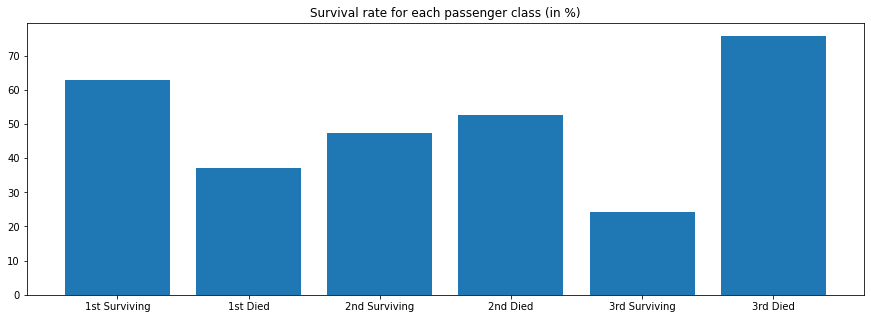

In [113]:
values = [elem*100 for elem in [firstClassSurvivalRatio,1-firstClassSurvivalRatio,secondClassSurvivalRatio, 1-secondClassSurvivalRatio, thirdClassSurvivalRatio, 1-thirdClassSurvivalRatio]]

plt.figure(figsize=(15, 5))
plt.bar(["1st Surviving","1st Died","2nd Surviving","2nd Died","3rd Surviving","3rd Died"], values)
plt.title("Survival rate for each passenger class (in %)")

##### <u> Did gender influence your odd of surviving?</u>


Will we be able to observe a major discrepancy between the genders regarding survival rate?<br>
It is well known, that women and children have a higher priority when evacuating a ship or a plane. 
Indeed this question is a bit more complex, as a pure look at the gender distribution may be missleading.<br><br>
Therefore, the gender question will split: 
It will be treated in this category, as well as later on, while taking into account the age too, to account for the male children for instance.

In [89]:
malePassengers = df[df.Sex == "male"]
maleRatio = size(malePassengers)/totalPassengers

maleDead = df[(df["Sex"] == "male") & (df["Survived"] == 0)]
maleAlive = df[(df["Sex"] == "male") & (df["Survived"] == 1)]
maleSurvivalRatio = size(maleAlive) / size(malePassengers)

femalePassengers = df[df.Sex == "female"]
femaleRatio = size(femalePassengers)/totalPassengers

femaleDead = df[(df["Sex"] == "female") & (df["Survived"] == 0)]
femaleAlive = df[(df["Sex"] == "female") & (df["Survived"] == 1)]
femaleSurvivalRatio = size(femaleAlive) / size(femalePassengers)

print(f"Male passenger count: {size(malePassengers)}\n\
Male passenger ratio: {toPercent(maleRatio)}%\n\
Male passenger survived: {size(maleAlive)}\n\
Male passenger dead: {size(maleDead)}\n\
Male survival ratio: {toPercent(maleSurvivalRatio)}%\n\n\
\
Female passenger count: {size(femalePassengers)}\n\
Female passenger ratio: {toPercent(femaleRatio)}%\n\
Female passenger survived: {size(femaleAlive)}\n\
Female passenger dead: {size(femaleDead)}\n\
Female survival ratio: {toPercent(femaleSurvivalRatio)}%")

Male passenger count: 577
Male passenger ratio: 64.8%
Male passenger survived: 109
Male passenger dead: 468
Male survival ratio: 18.9%

Female passenger count: 314
Female passenger ratio: 35.2%
Female passenger survived: 233
Female passenger dead: 81
Female survival ratio: 74.2%


From that data, we see that:

1) There were more men than women on board of the titanic (About 65% of the passengers were male).
2) The survial ratio for male passengers was way smaller (19%) than for female passengers (74%). These numbers clearly indicate that women had priority, while boarding the rescue boats compared to men, regardless of their class.

From this point on, there is an obvious additional question. Where the "rare" saved male passengers children, rich people or just lucky passengers?

Text(0.5, 1.0, 'Survival rate per gender (in %)')

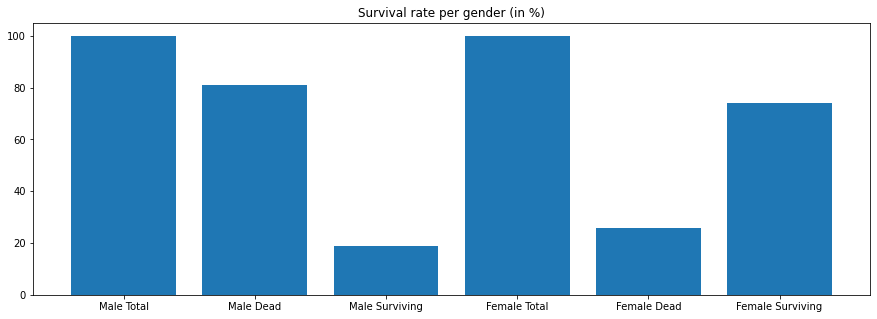

In [90]:
values = [elem*100 for elem in [1,1-maleSurvivalRatio,maleSurvivalRatio, 1, 1-femaleSurvivalRatio, femaleSurvivalRatio]]

plt.figure(figsize=(15, 5))
plt.bar(["Male Total","Male Dead","Male Surviving","Female Total","Female Dead","Female Surviving"], values)
plt.title("Survival rate per gender (in %)")

##### <u> Does the age of a passenger influence its survival odd?</u>

The sinking of the ship was probably quite stressful. Senior passengers probably had a harder time reaching the deck of the boat, as they usualy are weaker. Can we observe a high survival ratio for a specific "age class"? And what do the graphs of the surviving/dead male and female passengers look like? Are most of the male survivors children?

In [91]:
# Missing age information
noAgesGiven = df[df.Age.isnull()]

print(f"No age given for {size(noAgesGiven)} passengers. Only given for {size(df)-size(noAgesGiven)}")

No age given for 177 passengers. Only given for 714


Age repartion of all the passengers (not all the ages of the passengers were given, 177 were missing):

In [92]:
# All passengers
agesMixed = df["Age"].unique()
agesMixed = agesMixed[~np.isnan(agesMixed)]
counterMixed = [size(df[df.Age == val]) for val in agesMixed]

ageMales = malePassengers["Age"].unique()
ageMales = ageMales[~np.isnan(ageMales)]
counterMale = [size(df[(df["Age"] == val) & (df["Sex"] == "male")]) for val in ageMales]

ageFemale = femalePassengers["Age"].unique()
ageFemale = ageFemale[~np.isnan(ageFemale)]
counterFemale = [size(df[(df["Age"] == val) & (df["Sex"] == "female")]) for val in ageFemale]

Text(0.5, 1.0, 'Females')

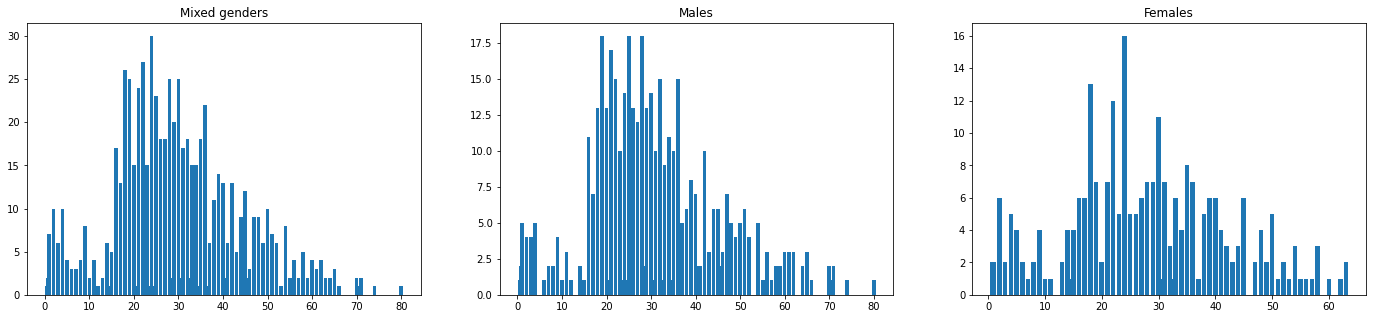

In [93]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixed, counterMixed)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMales, counterMale)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemale, counterFemale)
plt.title("Females")

We can see from those graphs, that the most prevalent male passenger age group was adults (from 18 to 35 years old). For female passengers the age classes were quite even, allthough we can also observe a bit higher presence of adult (from 18 to 35 years old).

How does the age repartition look like for deceased male and female passengers:

In [94]:
# Dead only
deads = df[df.Survived == 0]
agesMixedDead = deads["Age"].unique()
agesMixedDead = agesMixedDead[~np.isnan(agesMixedDead)]
counterMixedDead = [size(deads[deads.Age == val]) for val in agesMixedDead]

deadMales = df[(df.Survived == 0) & (df.Sex == "male")]
ageMalesDead = deadMales["Age"].unique()
ageMalesDead = ageMalesDead[~np.isnan(ageMalesDead)]
counterMaleDead = [size(deads[(deads["Age"] == val) & (deads["Sex"] == "male")]) for val in ageMalesDead]

deadFemales = df[(df.Survived == 0) & (df.Sex == "female")]
ageFemaleDead = deadFemales["Age"].unique()
ageFemaleDead = ageFemaleDead[~np.isnan(ageFemaleDead)]
counterFemaleDead = [size(deads[(deads["Age"] == val) & (deads["Sex"] == "female")]) for val in ageFemaleDead]

Text(0.5, 1.0, 'Females')

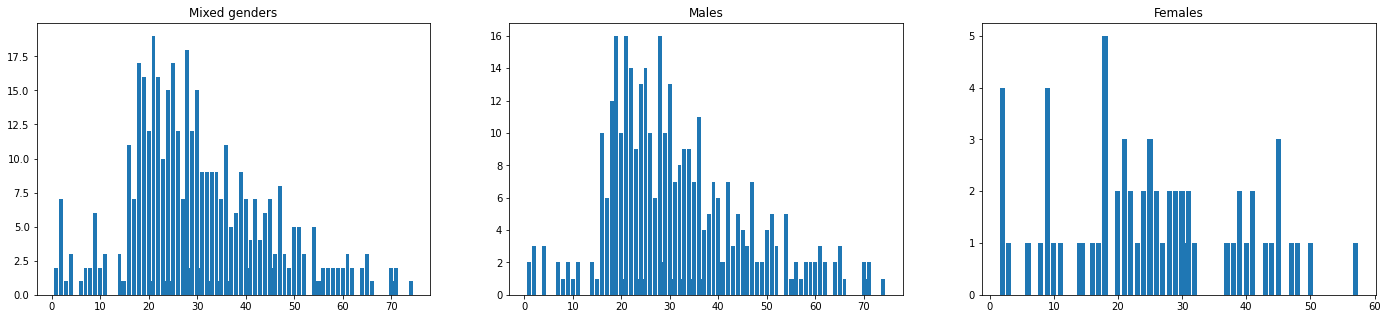

In [95]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixedDead, counterMixedDead)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMalesDead, counterMaleDead)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemaleDead, counterFemaleDead)
plt.title("Females")

We can observe that most of the deceased passengers (especialy true for male passengers) were adults, as they also represent the most prevalent passenger group. 

How does the age repartition look like for survivors:

In [96]:
# Alive only
alive = df[df.Survived == 1]
agesMixedAlive = alive["Age"].unique()
agesMixedAlive = agesMixedAlive[~np.isnan(agesMixedAlive)]
counterMixedAlive = [size(alive[alive.Age == val]) for val in agesMixedAlive]

aliveMales = df[(df.Survived == 0) & (df.Sex == "male")]
ageMalesAlive = aliveMales["Age"].unique()
ageMalesAlive = ageMalesAlive[~np.isnan(ageMalesAlive)]
counterMaleAlive = [size(alive[(alive["Age"] == val) & (alive["Sex"] == "male")]) for val in ageMalesAlive]

aliveFemales = df[(df.Survived == 0) & (df.Sex == "female")]
ageFemaleAlive = aliveFemales["Age"].unique()
ageFemaleAlive = ageFemaleAlive[~np.isnan(ageFemaleAlive)]
counterFemaleAlive = [size(alive[(alive["Age"] == val) & (alive["Sex"] == "female")]) for val in ageFemaleAlive]

Text(0.5, 1.0, 'Females')

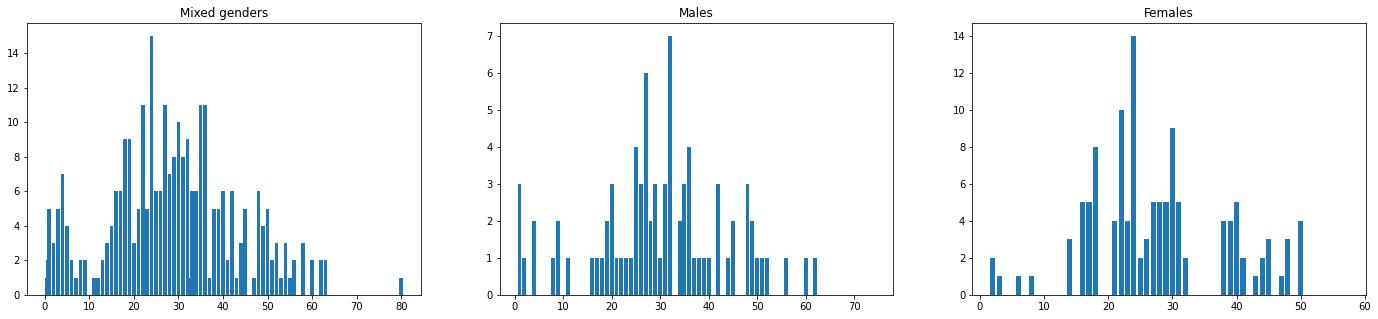

In [97]:
plt.figure(figsize=(24, 5))
plt.subplot(131)
plt.bar(agesMixedAlive, counterMixedAlive)
plt.title("Mixed genders")
plt.subplot(132)
plt.bar(ageMalesAlive, counterMaleAlive)
plt.title("Males")
plt.subplot(133)
plt.bar(ageFemaleAlive, counterFemaleAlive)
plt.title("Females")

As the survival rate for male passengers was quite low, it is hard to get any usable information from the graph about male passengers. In contrary, female passengers in adult age seem to have survived the most. 

Now that we have seen the age repartition for male and female survivors/deads, it would be interesting to analyse the survival rate per "age range":
- Children (0 -> 13)
- Teenagers (14 -> 18)
- Adults(18 -> 60)
- Senior Citizen (60 -> inf)

In [98]:
childrens = df[(df.Age <= 13)]
teenagers = df[(df.Age >= 14) & (df.Age < 18)]
adults = df[(df.Age >= 18) & (df.Age <= 60)]
seniors = df[(df.Age >= 61)]

childrenAlive = childrens[childrens.Survived == 1]
childrenDead = childrens[childrens.Survived == 0]

teenagersAlive = teenagers[teenagers.Survived == 1]
teenagersDead = teenagers[teenagers.Survived == 0]

adultsAlive = adults[adults.Survived == 1]
adultsDead = adults[adults.Survived == 0]

seniorsAlive = seniors[seniors.Survived == 1]
seniorsDead = seniors[seniors.Survived == 0]

In [99]:
print(f"Children count: {size(childrens)}\nTeenager count: {size(teenagers)}\nAdult count: {size(adults)}\nSenior count: {size(seniors)}\n")

print(f"\
Children survival: {size(childrenAlive)}\n\
Children dead: {size(childrenDead)}\n\
Teenagers survival: {size(teenagersAlive)}\n\
Teenagers dead: {size(teenagersDead)}\n\
Adults survival: {size(adultsAlive)}\n\
Adults dead: {size(adultsDead)}\n\
Senior survival: {size(seniorsAlive)}\n\
Senior dead: {size(seniorsDead)}")

Children count: 71
Teenager count: 42
Adult count: 579
Senior count: 22

Children survival: 42
Children dead: 29
Teenagers survival: 19
Teenagers dead: 23
Adults survival: 224
Adults dead: 355
Senior survival: 5
Senior dead: 17


<BarContainer object of 4 artists>

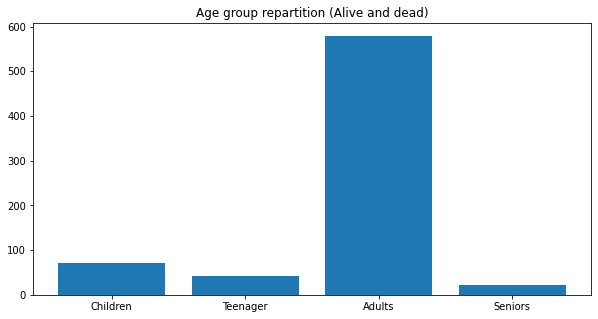

In [100]:
plt.figure(figsize=(10, 5))
plt.title("Age group repartition (Alive and dead)")
plt.bar(["Children","Teenager","Adults","Seniors"], [size(childrens),size(teenagers),size(adults),size(seniors)])

As evoked earlier on, the main age category on board of the titanic is adult age (from 18 to 60 years old). How do the different age ranges compare in regard of survival rate?

<BarContainer object of 8 artists>

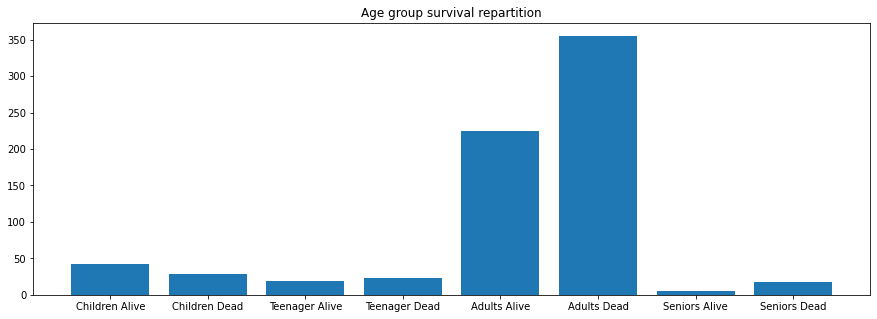

In [101]:
categories = ["Children Alive","Children Dead","Teenager Alive","Teenager Dead","Adults Alive","Adults Dead","Seniors Alive","Seniors Dead"]
values = [size(childrenAlive),size(childrenDead),size(teenagersAlive),size(teenagersDead),size(adultsAlive),size(adultsDead),size(seniorsAlive),size(seniorsDead)]

plt.figure(figsize=(15, 5))
plt.title("Age group survival repartition")
plt.bar(categories, values)

<BarContainer object of 8 artists>

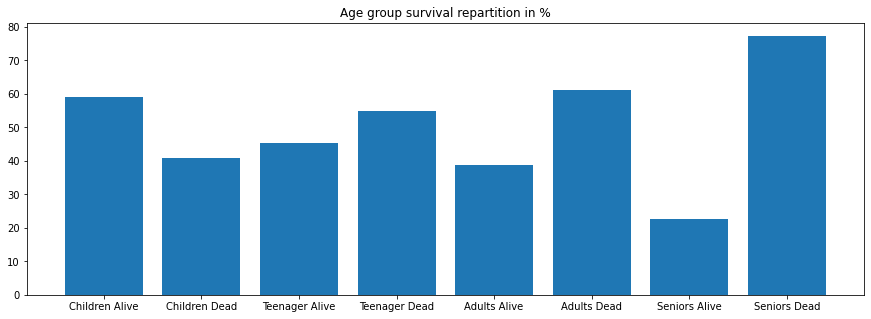

In [102]:
valuesPercent = [
    toPercent(size(childrenAlive)/+size(childrens)),
    toPercent(size(childrenDead)/size(childrens)),
    toPercent(size(teenagersAlive)/size(teenagers)),
    toPercent(size(teenagersDead)/size(teenagers)),
    toPercent(size(adultsAlive)/size(adults)),
    toPercent(size(adultsDead)/size(adults)),
    toPercent(size(seniorsAlive)/size(seniors)),
    toPercent(size(seniorsDead)/size(seniors))
]

plt.figure(figsize=(15, 5))
plt.title("Age group survival repartition in %")
plt.bar(categories, valuesPercent)

From that graph it is clearly visible, that children had a better chance of surviving (about 60%), and every age range afterwards has worse and worse survival ratios (teenager: about 45%, adults: about 40%, seniors: about 25%). This repartition clearly makes sense, as children (no matter their gender) had priority to board on a rescue boat, and the rest of the passengers were prioritized depending on their gender (mostly females). 
<br><br>
To check that hypothesis, we can determine the gender of surviving adults, as they represent the most prevalent group of passengers:

In [103]:
adultsMaleAlive = adultsAlive[adultsAlive.Sex == "male"]
adultsMaleDead = adultsDead[adultsDead.Sex == "male"]
adultsMale = adults[adults.Sex == "male"]

adultsFemaleAlive = adultsAlive[adultsAlive.Sex == "female"]
adultsFemaleDead = adultsDead[adultsDead.Sex == "female"]
adultsFemale = adults[adults.Sex == "female"]

print(f"Male adults alive: {size(adultsMaleAlive)}\nMale adults dead: {size(adultsMaleDead)}\nFemale adults alive: {size(adultsFemaleAlive)}\nFemale adults dead: {size(adultsFemaleDead)}")
print(f"\nMale total: {size(adultsMale)}\nFemale total: {size(adultsFemale)}")

Male adults alive: 68
Male adults dead: 308
Female adults alive: 156
Female adults dead: 47

Male total: 376
Female total: 203


<BarContainer object of 4 artists>

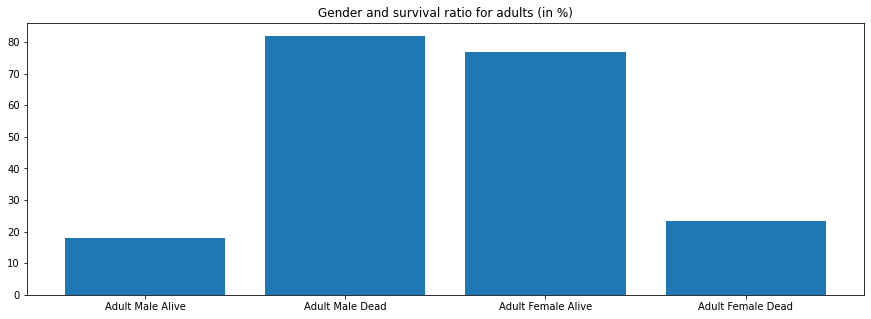

In [104]:
values = [toPercent(size(adultsMaleAlive)/size(adultsMale)),toPercent(size(adultsMaleDead)/size(adultsMale)),toPercent(size(adultsFemaleAlive)/size(adultsFemale)),toPercent(size(adultsFemaleDead)/size(adultsFemale))]
categories = ["Adult Male Alive","Adult Male Dead","Adult Female Alive","Adult Female Dead"]

plt.figure(figsize=(15, 5))
plt.title("Gender and survival ratio for adults (in %)")
plt.bar(categories, values)

Indeed it is very obvious that women were prioritized, as about only 20% of male passengers (including children) survived, compared to nearly 75% of female passengers.<br><br>

We can indeed observe a high survival ratio for children, as they probably got saved first together with women. We can therefore also notice that women had a way higher survival rate than men. In contrary to the starting hypothesis, that most of the male survivors would be children, we can clearly see on the graph of male survivors, that also adults got saved (probably first class passengers and richer passengers).

Compared to the passenger class or to the gender, the age doesn't provide a very accurate criteria, except children (high survival rate) and seniors (very low survival rate). Therefore, if we want to use the age as a criteria, it needs to be paired with the gender to be more "accurate".

##### <u>Did traveling alone increase your survival rate?</u>

In this section we are going to analyze both the traveling with:
- siblings / spouses
- parents / children

In a stressful scenario, it is important that people can focus. If the passengers had parents or children to take care of, they might get deconcentrated and thus this would reduce their surviving chances. Therefore, we may ask ourselves: Does traveling alone increase your survival odd? Do we observe a difference in survival rate depending on the number of relatives on board as well (SibSp + Parch)?

In [106]:
loneTraveller = df[df.SibSp + df.Parch == 0]
oneRelative = df[df.SibSp + df.Parch == 1]
twoRelative = df[df.SibSp + df.Parch == 2]
threeOrMoreRelative = df[df.SibSp + df.Parch >= 3]

print(f"Lone Traveller: {size(loneTraveller)}\nOne Relative Traveller: {size(oneRelative)}\nTwo Relative Traveller: {size(twoRelative)}\nThree or more Relative Traveller: {size(threeOrMoreRelative)}")

Lone Traveller: 537
One Relative Traveller: 161
Two Relative Traveller: 102
Three or more Relative Traveller: 91


As we can see from that data, most of the passengers did travel alone, without any siblings/spoused/parents or children.

In [109]:
loneSurvivor = loneTraveller[loneTraveller.Survived == 1]
loneDead = loneTraveller[loneTraveller.Survived == 0]

oneSurvivor = oneRelative[oneRelative.Survived == 1]
oneDead = oneRelative[oneRelative.Survived == 0]

twoSurvivor = twoRelative[twoRelative.Survived == 1]
twoDead = twoRelative[twoRelative.Survived == 0]

threeMoreSurvivor = threeOrMoreRelative[threeOrMoreRelative.Survived == 1]
threeMoreDead = threeOrMoreRelative[threeOrMoreRelative.Survived == 0]

print(f"Lone Traveller Survivor: {size(loneSurvivor)}\n\
Lone Traveller Deceased: {size(loneDead)}\n\n\
One Relative Survivor: {size(oneSurvivor)}\n\
One Relative Survivor: {size(oneDead)}\n\n\
Two Relative Survivor: {size(twoSurvivor)}\n\
Two Relative Survivor: {size(twoDead)}\n\n\
Three+ Relative Survivor: {size(threeMoreSurvivor)}\n\
Three+ Relative Survivor: {size(threeMoreDead)}\n")

Lone Traveller Survivor: 163
Lone Traveller Deceased: 374

One Relative Survivor: 89
One Relative Survivor: 72

Two Relative Survivor: 59
Two Relative Survivor: 43

Three+ Relative Survivor: 31
Three+ Relative Survivor: 60



In [112]:
loneTravellerRatio = size(loneSurvivor)/size(loneTraveller)
oneTravellerRatio = size(oneSurvivor)/size(oneRelative)
twoTravellerRatio = size(twoSurvivor)/size(twoRelative)
threeTravellerRatio = size(threeMoreSurvivor)/size(threeOrMoreRelative)

print(toPercent(loneTravellerRatio),toPercent(oneTravellerRatio),toPercent(twoTravellerRatio),toPercent(threeTravellerRatio))

30.4 55.3 57.8 34.1
